In [34]:
import torch as torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [19]:
number_of_words = 10
input_count = 1

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(number_of_words * input_count, 450)
        self.fc2 = nn.Linear(450, 450)
        self.fc3 = nn.Linear(450, 450)
        self.fc4 = nn.Linear(450, 450)
        self.fc5 = nn.Linear(450, 28*28)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        return x

net = Net()

In [21]:
loss = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [22]:
def train_nn(question_tensor, answer_tensor, model, loss=loss, optimizer=optimizer):
    optimizer.zero_grad()
    outputs = model(question_tensor)
    loss = loss(outputs, answer_tensor)
    loss.backward()
    optimizer.step()
    print(loss.item())

In [23]:
def load_image(image_path):
    # Load image using Pillow (PIL) library
    img = Image.open(image_path)

    # Convert image to grayscale
    img = img.convert("L")
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Flatten the image array
    img_array = img_array.flatten()
    
    # Convert the image array to a PyTorch tensor
    img_tensor = torch.tensor(img_array, dtype=torch.float32)
    
    # Normalize the pixel values to be between -1 and 1
    img_tensor = img_tensor / 255.0

    return img_tensor

In [24]:
def display_image(img_array):
    # turn into numpy
    img_array = np.array(img_array)
    
    # Reshape the flattened numpy array back to the original shape (32x32)
    img_array = img_array.reshape(28, 28)

    # Normalize the pixel values to be between 0 and 1 (assuming the input is between -1 and 1)
    img_array = (img_array + 1) / 2

    # Show the image using matplotlib
    plt.imshow(img_array, cmap='gray')
    plt.show()

In [25]:
zerofiles = os.listdir(r"trainingSet/0/")
onefiles = os.listdir(r"trainingSet/1/")
twofiles = os.listdir(r"trainingSet/2/")
threefiles = os.listdir(r"trainingSet/3/")
fourfiles = os.listdir(r"trainingSet/4/")
fivefiles = os.listdir(r"trainingSet/5/")
sixfiles = os.listdir(r"trainingSet/6/")
sevenfiles = os.listdir(r"trainingSet/7/")
eightfiles = os.listdir(r"trainingSet/8/")
ninefiles = os.listdir(r"trainingSet/9/")

In [35]:
questions = []
answers = []

for x in range(3795):
    questions.append(torch.Tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
    answers.append(load_image(rf"trainingSet/0/{zerofiles[x]}"))
    questions.append(torch.Tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]))
    answers.append(load_image(rf"trainingSet/1/{onefiles[x]}"))
    questions.append(torch.Tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))
    answers.append(load_image(rf"trainingSet/2/{twofiles[x]}"))
    questions.append(torch.Tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))
    answers.append(load_image(rf"trainingSet/3/{threefiles[x]}"))
    questions.append(torch.Tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]))
    answers.append(load_image(rf"trainingSet/4/{fourfiles[x]}"))
    questions.append(torch.Tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]))
    answers.append(load_image(rf"trainingSet/5/{fivefiles[x]}"))
    questions.append(torch.Tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]))
    answers.append(load_image(rf"trainingSet/6/{sixfiles[x]}"))
    questions.append(torch.Tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))
    answers.append(load_image(rf"trainingSet/7/{sevenfiles[x]}"))
    questions.append(torch.Tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))
    answers.append(load_image(rf"trainingSet/8/{eightfiles[x]}"))
    questions.append(torch.Tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))
    answers.append(load_image(rf"trainingSet/9/{ninefiles[x]}"))

In [36]:
for x in range(len(questions) - 29000):
    train_nn(questions[x], answers[x], net)

0.22789086401462555
0.21456775069236755
0.16949953138828278
0.15030567348003387
0.14219893515110016
0.12176122516393661
0.09675697237253189
0.09989278018474579
0.10649725794792175
0.07138809561729431
0.06209597364068031
0.05837221443653107
0.0729328915476799
0.05512561649084091
0.08173258602619171
0.08013938367366791
0.0701364278793335
0.08001746982336044
0.11078456789255142
0.06791037321090698
0.09727843105792999
0.06541159003973007
0.06802986562252045
0.04643216356635094
0.04064882919192314
0.06365133821964264
0.10491678863763809
0.06623208522796631
0.07737931609153748
0.07048693299293518
0.08545295894145966
0.0607009194791317
0.07898420095443726
0.06700742989778519
0.05987143516540527
0.06660295277833939
0.0674397423863411
0.04777579754590988
0.06955748051404953
0.04343689605593681
0.08334720134735107
0.051906947046518326
0.0865718200802803
0.05461172014474869
0.045065272599458694
0.08031369000673294
0.04724631831049919
0.06107145920395851
0.07563813030719757
0.04728444293141365
0.1

C:\Users\user\AppData\Local\Temp\ipykernel_3928\4256565459.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  display_image(torch.tensor(net(torch.tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=torch.float32)), dtype=torch.float32))


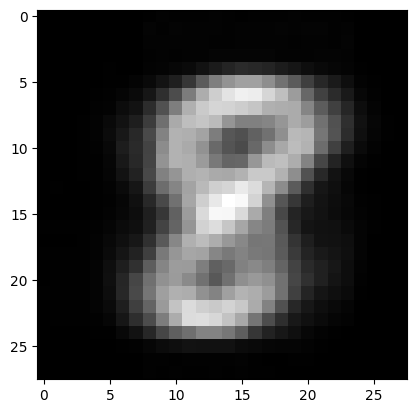

In [46]:
display_image(torch.tensor(net(torch.tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=torch.float32)), dtype=torch.float32))